<a href="https://colab.research.google.com/github/linearAlgebra2024/linearAlgebra/blob/feat-minje/%EB%B6%93%EA%BC%BF%EB%B6%84%EB%A5%98%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%cd /content/drive/MyDrive/Colab Notebooks/

/content/drive/MyDrive/Colab Notebooks


In [3]:
iris = pd.read_csv("Iris.csv")
x = iris[['SepalLengthCm','SepalWidthCm', 'PetalLengthCm','PetalWidthCm']].values
y = iris['Species'].values

labels = {"Iris-setosa":0,
          "Iris-versicolor":1,
          "Iris-virginica":2
          }

y = np.array([labels[label] for label in y])

In [4]:
N = 50  # 종 하나당 데이터 수
D = 4   # 특성 개수
K = 3   # 종 개수

def train_nn(x, y, D, K, reg=.001, eta=.05, epochs=1000):
    # W값 초기화
    W1 = np.random.randn(D, 100) * 0.01
    b1 = np.zeros((1, 100))
    W2 = np.random.randn(100, K) * 0.01
    b2 = np.zeros((1, K))

    losses = []
    accs = []


    for epoch in range(epochs):
        h = np.maximum(0, x.dot(W1) + b1) # hidden layer
        f = h.dot(W2) + b2 # output layer

        # hidden layer 역전파
        p = np.exp(f) / np.sum(np.exp(f), axis=1, keepdims=True)
        dhidden = p.copy()
        dhidden[range(x.shape[0]), y] -= 1
        dhidden /= x.shape[0]
        dW2 = (h.T).dot(dhidden) + reg * W2
        db2 = np.sum(dhidden, axis=0, keepdims=True)

        # 활성화 함수 relu
        drelu = (dhidden).dot(W2.T)
        drelu[h <= 0] = 0

        # input layer 역전파
        dW1 = (x.T).dot(drelu) + reg * W1
        db1 = np.sum(drelu, axis=0, keepdims=True)

        # 가중치 업데이트
        W1 -= eta * dW1;
        W2 -= eta * dW2;
        b1 -= eta * db1;
        b2 -= eta * db2;

        # 정확도
        hidd = np.maximum(0, x.dot(W1) + b1)
        scores = hidd.dot(W2) + b2
        pred = np.argmax(scores, axis=1)

        acc = (pred==y) / float(y.shape[0])
        accs.append(sum(acc))

        # 비용
        data_loss = -np.sum(np.log(p[range(x.shape[0]), y])) / x.shape[0]
        reg_loss = 0.5 * reg * (np.sum(W2**2) + np.sum(W1**2))
        loss = data_loss + reg_loss
        losses.append(loss)
        if epoch % 100 == 0:
            print("{}: loss={} acc={}".format(epoch, loss, sum(acc)))

    return W1, b1, W2, b2, losses, accs

W1, b1, W2, b2, losses, accs = train_nn(x, y, D, K)

0: loss=1.097241428022547 acc=0.46666666666666606
100: loss=0.49972385336480185 acc=0.7933333333333346
200: loss=0.2815773416820402 acc=0.9733333333333357
300: loss=0.17990223522479512 acc=0.9800000000000024
400: loss=0.1374235880681019 acc=0.9866666666666691
500: loss=0.11714087523698027 acc=0.9866666666666691
600: loss=0.1057966239481543 acc=0.9800000000000024
700: loss=0.09867597057030691 acc=0.9800000000000024
800: loss=0.09382619477883594 acc=0.9800000000000024
900: loss=0.09032092450141847 acc=0.9800000000000024


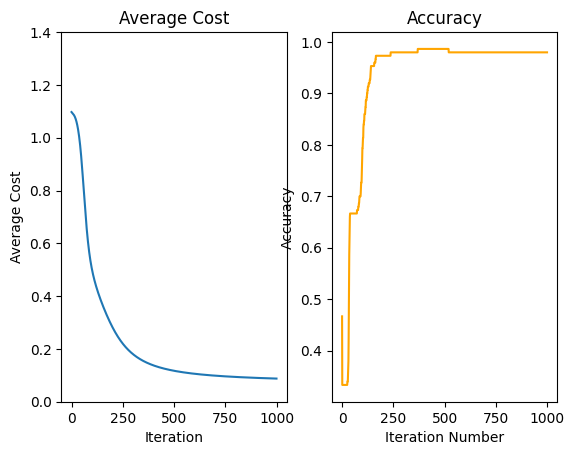

In [5]:
# 비용 그래프 출력
ax = plt.subplot(1,2,1)
plt.ylim(0,1.4)
plt.plot(losses)
plt.title('Average Cost')
plt.ylabel('Average Cost')
plt.xlabel('Iteration')

# 정확도 그래프 출력
bx = plt.subplot(1,2,2)
plt.plot(accs, color='orange')
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Iteration Number')
plt.show()